In [1]:
import pandas as pd
import os


In [2]:
path_raw = "../data/raw/"


In [3]:
os.listdir(path_raw)


['aprilia.csv',
 'bmw.csv',
 'ducati.csv',
 'honda.csv',
 'kawasaki.csv',
 'royald_enfield.csv',
 'zontes.csv']

In [8]:
# 1️⃣ Define la ruta donde están tus CSV

archivos = os.listdir(path_raw)

# 2️⃣ Filtra solo CSVs
archivos = [f for f in archivos if f.endswith('.csv')]

# 3️⃣ Crea una lista vacía para guardar DataFrames
lista_df = []

# 4️⃣ Loop sobre cada CSV
for archivo in archivos:
    ruta_archivo = os.path.join(path_raw, archivo)
    
    # Marca = nombre del archivo sin extensión
    marca = archivo.replace('.csv', '').replace('_', ' ').upper()
    
    # Lee el CSV
    df = pd.read_csv(ruta_archivo)
    
    # Limpia encabezados (quitar espacios)
    df.columns = df.columns.str.strip().str.upper()
    
    # Agrega la columna MARCA
    df['MARCA'] = marca
    
    # Agrega a la lista
    lista_df.append(df)

    print(f"✅ {marca} leído con {len(df)} filas.")

# 5️⃣ Combina todos en un solo DataFrame
df_consolidado = pd.concat(lista_df, ignore_index=True)

# 6️⃣ Verifica columnas
print(df_consolidado.columns)

# 7️⃣ Guarda el consolidado
df_consolidado.to_csv("../data/motos_todas.csv", index=False)


✅ APRILIA leído con 20 filas.
✅ BMW leído con 41 filas.
✅ DUCATI leído con 35 filas.
✅ HONDA leído con 44 filas.
✅ KAWASAKI leído con 33 filas.
✅ ROYAL ENFIELD leído con 33 filas.
✅ ZONTES leído con 23 filas.
Index(['MODELO', 'CON_CARNET', 'CILINDRADA', 'POTENCIA', 'RUEDA_DELANTERA',
       'RUEDA_TRASERA', 'FRENO_DELANTERO', 'FRENO_TRASERO', 'ALTURA_ASIENTO',
       'PESO_VACIO', 'PRECIO', 'MARCA'],
      dtype='object')


In [9]:
df = pd.read_csv("../data/motos_todas.csv")
df.head()


,MODELO,CON_CARNET,CILINDRADA,POTENCIA,RUEDA_DELANTERA,RUEDA_TRASERA,FRENO_DELANTERO,FRENO_TRASERO,ALTURA_ASIENTO,PESO_VACIO,PRECIO,MARCA
0,SXR,AM,49,3.2,120/70-12,120/70-12,D220,D220,775,n.d.,2599,APRILIA
1,RX 125,A1,124,14.9,90/90-21,120/80-18,D260,D220,880,134,4199,APRILIA
2,SX 125,A1,124,14.9,90/90-21,120/80-18,D260,D220,880,134,4199,APRILIA
3,RS 125,A1,124,14.9,100/80-17,140/70ZR17,D300,D218,820,144,5499,APRILIA
4,Tuono 125,A1,124,14.9,100/80-17,140/70ZR17,D300,D218,799,144,5399,APRILIA


In [10]:
df_bmw = df[df["MARCA"] == "BMW"]
df_bmw.head()


,MODELO,CON_CARNET,CILINDRADA,POTENCIA,RUEDA_DELANTERA,RUEDA_TRASERA,FRENO_DELANTERO,FRENO_TRASERO,ALTURA_ASIENTO,PESO_VACIO,PRECIO,MARCA
20,G 310 R,A2,313,34,110/70 ZR17,150/60 R17,D300,D240,785,158.5,6075,BMW
21,G 310 GS,A2,313,34,110/80 R19,150/70 R17,D300,D240,820,169.5,6930,BMW
22,C 400 X,A2,350,34,120/70 ZR15,150/70 ZR14,2D265,D265,775,204,7250,BMW
23,C 400 GT,A2,350,34,120/70-15,150/70-14,2D265,D265,775,212,8290,BMW
24,CE 02,A1-AM,Eléct.,14,120/80-14,150/70-14,D239,D220,750,132,8425,BMW


In [14]:
# Total de motos
print("Total de registros:", len(df))

# Conteo por marca
print(df["MARCA"].value_counts())



Total de registros: 229
MARCA
HONDA            44
BMW              41
DUCATI           35
KAWASAKI         33
ROYAL ENFIELD    33
ZONTES           23
APRILIA          20
Name: count, dtype: int64


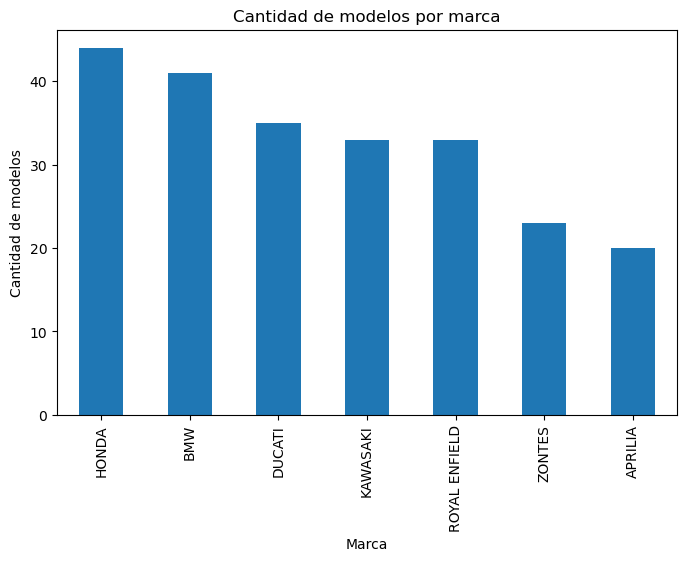

In [15]:
import matplotlib.pyplot as plt

df["MARCA"].value_counts().plot(kind="bar", figsize=(8,5))
plt.title("Cantidad de modelos por marca")
plt.xlabel("Marca")
plt.ylabel("Cantidad de modelos")
plt.show()
